This Notebook is made by Miftahul Arifin

from data science bootcamp at Digital Skola

in this notebook we will talking about supervised learning. This notebook contains material on classification, knn, decision trees, entropy, random forest and regression, evaluation metrics

# Classification
Classification is a supervised learning task where the goal is to predict the class label of a new data point given a set of training data points and their class labels.

# KNN Algorithm

KNN is a non-parametric, lazy learning algorithm that classifies a new data point based on the k nearest neighbors of that data point. The class label of the new data point is then determined by the majority vote of the k nearest neighbors.

# Decision Tree Algorithm
Decision trees are a supervised learning algorithm that classifies a new data point by recursively splitting the feature space into smaller and smaller regions until each region contains only data points of a single class.

# Random Forest Algorithm
Random forest is an ensemble learning algorithm that combines the predictions of multiple decision trees to improve the accuracy of the predictions.



# Evaluation Metrics
Evaluation metrics are used to measure the accuracy of a machine learning model. Some common evaluation metrics for classification tasks include accuracy, precision, recall, and F1 score. Some common evaluation metrics for regression tasks include mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE).

# Import Libraries

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Prep
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Connect to Titanic Dataset
Titanic dataset is from this link https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

In [433]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

## Checking Null Value

In [434]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [435]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are several null values in some columns.

List columns that has null values.
- Age
- Cabin
- Embarked

## Dataframe Checking

### PassengerId Column
Pada kolom ID, dapat diperumpamakan bahwa pada kolom ini, ID tidak boleh sama, sehingga disini kita akan melakukan checking berupa:
- duplicate values

In [436]:
# Checking duplicate values
df_titanic['PassengerId'].duplicated().sum()

0

in columns PassengersId, no duplicated values.

### Survived Column
pada kolom ini, kita dapat menyimpulkan nilai 1, merupakan orang yang survive, dan 0 merupakan orang yang tidak survive, oleh karena itu kita dapat menyimpulkan kolom ini berisi nilai boolean values, 1 & 0.
- Making sure that the values in this columns are only 1 & 0.

In [437]:
# checking to ensure that the number is between 1 and 0
df_titanic['Survived'].unique()

array([0, 1])

### Pclass Column
pada kolom ini kita hanya memastikan bahwa nilai yg terkandung pada kolom ini yakni 1, 2 dan 3. hal ini dapat dianalisa pada kelas Passenger berupa kelas 1, 2 dan kelas 3.

In [438]:
# checking to ensure that the number is only 1, 2, and 3
df_titanic['Pclass'].unique()

array([3, 1, 2])

### Additional Dataframe Information

Selebihnya untuk datanya dapat dianlisa sebagai berikut:
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Handling Missing Values

In [439]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [440]:
nullvalues = df_titanic.isnull().sum()

In [441]:
nullvalues

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [442]:
nullvalues[nullvalues != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

untuk melihat hubungan antar kolom, sehingga pengisian null values tepat, maka disini kita akan menggunakan heatmap, akan tetapi dalam penggunaan heatmap ini, terdapat kolom yang bertipe objek yang tidak akan kita masukkan ke dalam heatmap ini. seperti kolom nama, tiket dan kabin.

### Label Encoder - Sex Column

In [443]:
le = LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])
df_titanic['Sex'].unique()

array([1, 0])

In [444]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


df_titanic update info:
- male = 1
- female = 0

### Ordinal Encoder - Embarked

In [445]:
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [446]:
# Checking null values, we can check manualy because it's the column only have 2 null values
df_titanic[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


insight:
- Terdapat data yang sama pada tiket, fare, cabin.

In [447]:
# Checking the dataset from tiket, fare and cabin columns
df_titanic[(df_titanic['Ticket'] == '113572') | (df_titanic['Cabin'] == 'B28')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [448]:
df_titanic[(df_titanic['PassengerId'] == 62) | (df_titanic['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


ditinjau dari tiket, cabin dan passengerid, tidak memberikan apapun, dikarenakan kolom embarked, merupakan kolom berupa tipe data kategorik, maka disini, kita dapat menggangap embarked dapat diisi dengan nilai mode.

In [449]:
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [450]:
df_titanic['Embarked'].fillna('S', inplace=True)

In [451]:
Order_badge = ['S', 'C', 'Q']
oe = OrdinalEncoder(categories=[Order_badge])

df_titanic['Embarked'] = oe.fit_transform(df_titanic[['Embarked']]).astype(int)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


### Heatmap

In [452]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [453]:
df_titanic_heatmap = df_titanic.loc[:, ~df_titanic.columns.isin(['Name', 'Ticket', 'Cabin'])]

In [454]:
df_titanic_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


<Axes: >

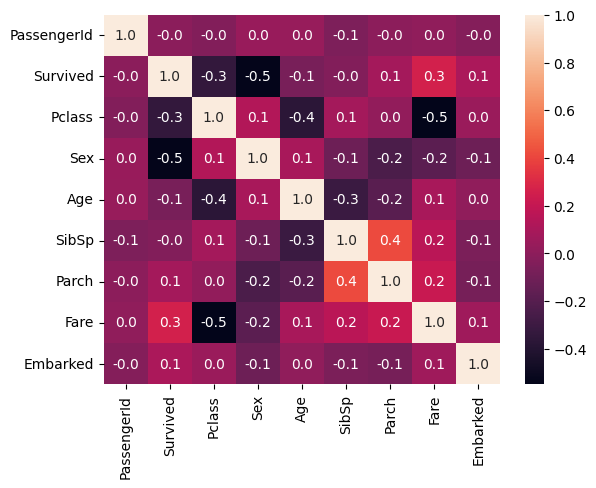

In [455]:
sns.heatmap(df_titanic_heatmap.corr(), annot=True, fmt=".1f")

dari heatmap diatas, dapat disimpulkan bahwa, antar kolom, tidak terlalu berkolerasi.

### Age Column

In [456]:
df_titanic['Age'].isnull().sum()

177

disini untuk melihat missing values tersebut, saya akan menggunakan scatter plot sebagai visualisasi data, untuk menentukan metode yang pas untuk mengisi nilai null tersebut.

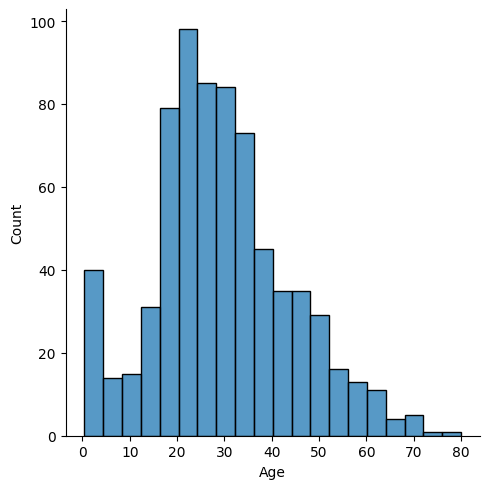

In [457]:
# Checking distribusi data
sns.displot(df_titanic['Age'])

In [458]:
# dilihat dari distribusi datanya, kita dapat menggunakan mean imputer, dikarenakan distribusinya tergolong distribusi data normal
# Mean impute
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())

In [459]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


### Cabin Columns
terdapat beberapa masukan dari forum kaggle yang telah saya ambil, dimana dapat dilihat pada link berikut https://www.kaggle.com/c/titanic/discussion/3189

pada intinya kolom kabin memiliki nilai missing values lebih dari 80%, jika ingin dilakukan handling missing values, atau mengisi values secara manual, akan menghabiskan banyak waktu, selain itu rasanya tidak akan tepat jika mengisi dengan menggunakan mean, median, atau mode. dikarenakan data yang hilang terlalu banyak, cara yang dapat dilakukan sekarang yakni melakukan drop kolom dari cabin.

In [460]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [461]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [462]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


# Train-Test Split

In [463]:
X = df_titanic[['Pclass', 'Age',	'SibSp',	'Parch', 'Sex']]
y = df_titanic['Survived']

In [464]:
X.head()

,Pclass,Age,SibSp,Parch,Sex
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1


In [465]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [466]:
# Dataset training and testing splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [467]:
print(X_train.shape, X_test.shape)

(712, 5) (179, 5)


In [468]:
print(y_train.shape, y_test.shape)

(712,) (179,)


# Standarisasi

In [469]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    data = scaler.fit_transform(X_train),
    columns = X.columns
)

X_test_scaled = pd.DataFrame(
    data = scaler.transform(X_test),
    columns = X.columns
)

In [470]:
X_train_scaled

,Pclass,Age,SibSp,Parch,Sex
0,0.835258,0.692249,0.411937,5.878145,-1.376339
1,-0.356533,-0.673327,1.290077,-0.468897,0.726565
2,0.835258,0.009461,-0.466204,-0.468897,0.726565
3,0.835258,1.299171,0.411937,-0.468897,-1.376339
4,0.835258,0.540518,1.290077,-0.468897,0.726565
...,...,...,...,...,...
707,0.835258,-0.013366,-0.466204,-0.468897,-1.376339
708,0.835258,-0.013366,1.290077,-0.468897,-1.376339
709,-1.548324,0.616383,0.411937,-0.468897,-1.376339
710,-0.356533,1.526767,-0.466204,-0.468897,-1.376339


In [471]:
X_test_scaled

,Pclass,Age,SibSp,Parch,Sex
0,-0.356533,-0.142270,-0.466204,0.800512,0.726565
1,0.835258,0.161191,-0.466204,-0.468897,0.726565
2,-1.548324,0.388787,0.411937,-0.468897,-1.376339
3,-1.548324,0.692249,0.411937,-0.468897,-1.376339
4,0.835258,-0.013366,1.290077,-0.468897,0.726565
...,...,...,...,...,...
174,0.835258,-0.013366,0.411937,-0.468897,-1.376339
175,0.835258,-0.369866,-0.466204,-0.468897,0.726565
176,0.835258,0.995710,-0.466204,-0.468897,0.726565
177,-1.548324,0.312922,-0.466204,-0.468897,0.726565


# Classification Model

## Library

In [472]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [473]:
# Evaluation Metrix
# fungsi dari evaluation metrix digunakan untuk mengetahui akurasi, presisi dan recall
def classification_eval (aktual, prediksi, name):
  cm = confusion_matrix(aktual,prediksi)
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]

  akurasi = round((tp+tn)/(tp+tn+fp+fn) * 100, 2)
  presisi = round((tp) / (tp+fp) * 100, 2)
  recall = round((tp) / (tp+fn) * 100, 2)

  print("Evaluation Model: ", name)
  print(cm)
  print("akurasi: ", akurasi, "%")
  print("presisi: ", presisi, "%")
  print("recall: ", recall, "%")

## KNN

### Find Optimal Parameter

In [474]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

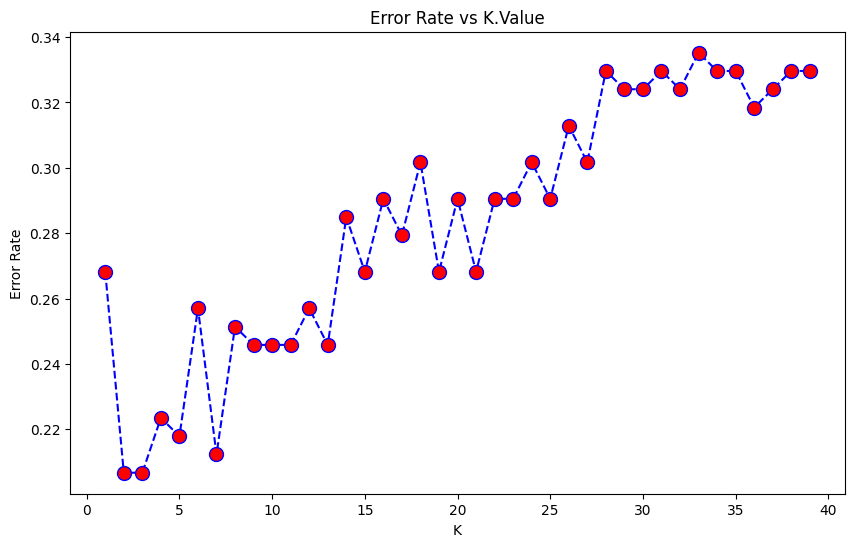

In [475]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor = 'red', markersize=10)
plt.title('Error Rate vs K.Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### KNN-Model

In [476]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [477]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [478]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model:  KNN Training
[[399  44]
 [ 57 212]]
akurasi:  85.81 %
presisi:  82.81 %
recall:  78.81 %


In [479]:
classification_eval(y_test, y_test_pred, 'KNN Training')

Evaluation Model:  KNN Training
[[89 17]
 [21 52]]
akurasi:  78.77 %
presisi:  75.36 %
recall:  71.23 %


## Decision Tree

### Find Optimal Parameter

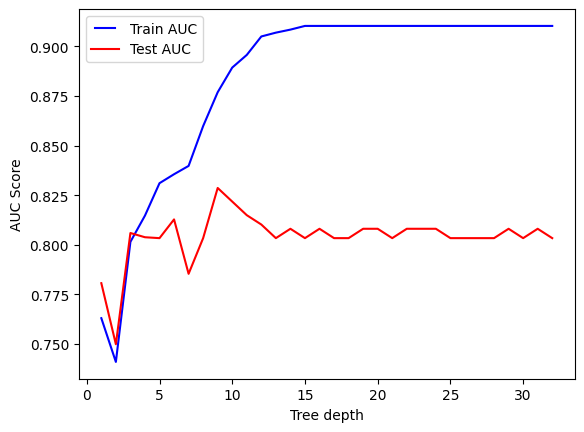

In [480]:
max_depths = np.linspace(1,32,32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=round(max_depth))
  dt.fit(X_train, y_train)

  # Train AUC
  y_pred = dt.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  # Test AUC
  y_pred = dt.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('Tree depth')
plt.show()

### Decision Tree Model

In [481]:
dectree = DecisionTreeClassifier(max_depth=16)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [482]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [483]:
pd.DataFrame(y_test_pred, columns=['Survived'])

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
174,1
175,0
176,0
177,0


In [484]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model:  Decision Tree Training
[[431  12]
 [ 41 228]]
akurasi:  92.56 %
presisi:  95.0 %
recall:  84.76 %


In [485]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model:  Decision Tree Testing
[[90 16]
 [17 56]]
akurasi:  81.56 %
presisi:  77.78 %
recall:  76.71 %


## Random Forest

In [486]:
ranfor = RandomForestClassifier(max_depth=18)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=18)

In [487]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [488]:
classification_eval(y_train, y_train_pred, 'Random Forest Testing')

Evaluation Model:  Random Forest Testing
[[425  18]
 [ 35 234]]
akurasi:  92.56 %
presisi:  92.86 %
recall:  86.99 %


In [489]:
classification_eval(y_test, y_test_pred, 'Random Forest Testing')

Evaluation Model:  Random Forest Testing
[[86 20]
 [16 57]]
akurasi:  79.89 %
presisi:  74.03 %
recall:  78.08 %


## Logistic Regression

In [490]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [491]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [492]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [493]:
classification_eval(y_train, y_train_pred, "Logistic Regression Training")

Evaluation Model:  Logistic Regression Training
[[382  61]
 [ 80 189]]
akurasi:  80.2 %
presisi:  75.6 %
recall:  70.26 %


In [494]:
classification_eval(y_test, y_test_pred, "Logistic Regression testing")

Evaluation Model:  Logistic Regression testing
[[87 19]
 [24 49]]
akurasi:  75.98 %
presisi:  72.06 %
recall:  67.12 %


# Super Vector Machine (SVM)
Super Vector Machine (SVM) is a supervised learning algorithm that can be used for both classification and regression tasks. SVMs work by finding a hyperplane that separates the data into two classes with the maximum margin.

The margin is the distance between the hyperplane and the closest data points from each class. SVMs are able to find hyperplanes that maximize the margin, even for non-linearly separable data.

# Ensemble Learning
Ensemble learning is a machine learning technique that combines the predictions of multiple models to produce a more accurate prediction. Ensemble learning works by exploiting the diversity of the predictions from the individual models. If the individual models make different mistakes, then the ensemble model is less likely to make the same mistakes.

There are many different ensemble learning algorithms, but some of the most common include:

- Bagging: Bagging works by training multiple models on different bootstrapped samples of the training data. The predictions from the individual models are then averaged to produce the final prediction.
- Boosting: Boosting works by training multiple models in a sequential order, where each model is trained to improve the performance of the previous model. The predictions from the individual models are then weighted and summed to produce the final prediction.
- Stacking: Stacking works by training a meta-model on the predictions from multiple base models. The meta-model is then used to produce the final prediction.

Ensemble learning can be used to improve the performance of any machine learning algorithm. However, ensemble learning is particularly effective for improving the performance of algorithms that are prone to overfitting, such as decision trees and neural networks.

# Connect to HR_Dataset

In [495]:
df_hr = pd.read_csv('https://raw.githubusercontent.com/pplonski/datasets-for-start/master/employee_attrition/HR-Employee-Attrition-All.csv')
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Import Libraries

In [2]:
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

## Label Encoding

In [497]:
df_hr['Attrition'] = le.fit_transform(df_hr['Attrition']).astype(int)

In [498]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [499]:
df_hr[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']] = df_hr[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']].apply(LabelEncoder().fit_transform).astype(int)

In [500]:
df_hr['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# Test-Train Split

In [501]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [502]:
X = df_hr.drop(columns='Attrition')
y = df_hr['Attrition']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [503]:
X_train.shape, y_train.shape

((1029, 34), (1029,))

In [504]:
X_test.shape, y_test.shape

((441, 34), (441,))

# Classification Model

## SVM Algorithm

Source Code: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

In [505]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [506]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Model Report
print(classification_report(y_test, y_pred))

Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       373
           1       0.48      0.16      0.24        68

    accuracy                           0.84       441
   macro avg       0.67      0.56      0.58       441
weighted avg       0.80      0.84      0.81       441



## Ensemble Algorithm

Learning Source: https://www.datacamp.com/tutorial/ensemble-learning-python

In [507]:
#Create Ensemble Algorithm
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [508]:
print('Akurasi: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi:  0.8458049886621315
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       373
           1       0.50      0.18      0.26        68

    accuracy                           0.85       441
   macro avg       0.68      0.57      0.59       441
weighted avg       0.81      0.85      0.81       441



# Connect to Fifa Dataset

In [53]:
df_fifa = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/fifa.csv')
df_fifa.head()

,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,76,NaN,25,21,20,6,11,15,14,8
1,1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,...,85,NaN,22,31,23,7,11,15,14,11
2,2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,...,80,NaN,29,26,26,10,8,11,5,15
3,3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,...,91,NaN,25,41,27,13,15,10,9,12
4,4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,...,37,NaN,25,25,25,87,85,92,90,86


# Data Preprocessing

## Removing Columns

In [54]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  16155 non-null  int64  
 1   sofifa_id                   16155 non-null  int64  
 2   player_url                  16155 non-null  object 
 3   short_name                  16155 non-null  object 
 4   long_name                   16155 non-null  object 
 5   age                         16155 non-null  int64  
 6   dob                         16155 non-null  object 
 7   height_cm                   16155 non-null  int64  
 8   weight_kg                   16155 non-null  int64  
 9   nationality                 16155 non-null  object 
 10  club_name                   15916 non-null  object 
 11  league_name                 15916 non-null  object 
 12  league_rank                 15916 non-null  float64
 13  overall                     161

In [55]:
df_fifa.drop(columns=['player_url', 'Unnamed: 0', 'long_name', 'player_tags', 'player_traits', 'dob', 'league_name', 'club_name',
                      'loaned_from', 'joined', 'mentality_composure', 'release_clause_eur', 'sofifa_id', 'nation_position',
                      'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
                      'gk_positioning', 'short_name', 'nationality', 'club_name', 'preferred_foot',
                      'work_rate', 'body_type', 'real_face', 'team_position', 'team_jersey_number',
                      'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                      'league_rank'], inplace=True)

In [56]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         16155 non-null  int64 
 1   height_cm                   16155 non-null  int64 
 2   weight_kg                   16155 non-null  int64 
 3   overall                     16155 non-null  int64 
 4   potential                   16155 non-null  int64 
 5   value_eur                   16155 non-null  int64 
 6   wage_eur                    16155 non-null  int64 
 7   player_positions            16155 non-null  object
 8   international_reputation    16155 non-null  int64 
 9   weak_foot                   16155 non-null  int64 
 10  skill_moves                 16155 non-null  int64 
 11  attacking_crossing          16155 non-null  int64 
 12  attacking_finishing         16155 non-null  int64 
 13  attacking_heading_accuracy  16155 non-null  in

## Label Encoding

Fifa Categorize Position Guide:
https://www.guidetofootball.com/tactics/playing-positions/

In [57]:
# Categorize Position
forward_player = ['LW', 'LS', 'CS', 'RS', 'LAM', 'CAM', 'RAM', 'RW', 'CF']
midfield_player = ['LM', 'LCM', 'LWB', 'LDM', 'CDM', 'CM', 'RDM', 'RCM', 'RWB', 'RM']
backliner_player = ['LB', 'LCB', 'CB', 'RCB', 'RB']

# Labeling the position
df_fifa.loc[df_fifa['player_positions'] == 'GK', 'player_position'] = 0
df_fifa.loc[df_fifa['player_positions'].isin(forward_player), 'player_position'] = 3
df_fifa.loc[df_fifa['player_positions'].isin(midfield_player), 'player_position'] = 2
df_fifa.loc[df_fifa['player_positions'].isin(backliner_player), 'player_position'] = 1

In [58]:
df_fifa['player_position'].unique()

array([ 3., nan,  0.,  2.,  1.])

In [59]:
df_fifa['player_position'].value_counts()

1.0    3045
0.0    1775
2.0    1610
3.0     547
Name: player_position, dtype: int64

## filling null values

(array([1775.,    0.,    0., 3045.,    0.,    0., 1610.,    0.,    0.,
         547.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

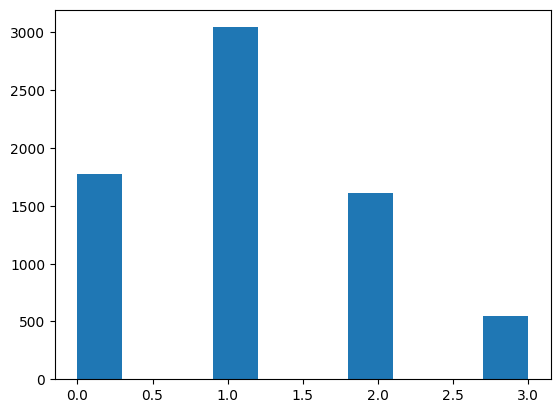

In [60]:
plt.hist(df_fifa['player_position'])

In [61]:
df_fifa['player_position'].fillna(int(df_fifa['player_position'].mean()), inplace=True)

In [62]:
df_fifa['player_position'] = df_fifa['player_position'].astype(int)
df_fifa['player_position'].value_counts()

1    12223
0     1775
2     1610
3      547
Name: player_position, dtype: int64

In [63]:
df_fifa.drop('player_positions', axis=1, inplace=True)

In [64]:
df_fifa.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,27,169,67,93,95,100500000,550000,5,3,4,...,76,25,21,20,6,11,15,14,8,3
1,29,185,80,92,92,79000000,375000,5,4,5,...,85,22,31,23,7,11,15,14,11,1
2,30,180,80,90,90,54500000,275000,5,2,4,...,80,29,26,26,10,8,11,5,15,1
3,32,195,95,90,90,52500000,275000,5,4,4,...,91,25,41,27,13,15,10,9,12,1
4,28,193,92,90,90,63500000,300000,5,4,1,...,37,25,25,25,87,85,92,90,86,0


In [65]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         16155 non-null  int64
 1   height_cm                   16155 non-null  int64
 2   weight_kg                   16155 non-null  int64
 3   overall                     16155 non-null  int64
 4   potential                   16155 non-null  int64
 5   value_eur                   16155 non-null  int64
 6   wage_eur                    16155 non-null  int64
 7   international_reputation    16155 non-null  int64
 8   weak_foot                   16155 non-null  int64
 9   skill_moves                 16155 non-null  int64
 10  attacking_crossing          16155 non-null  int64
 11  attacking_finishing         16155 non-null  int64
 12  attacking_heading_accuracy  16155 non-null  int64
 13  attacking_short_passing     16155 non-null  int64
 14  attack

# Train-Test split

In [66]:
X = df_fifa.drop('player_position', axis=1)
y = df_fifa['player_position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
X_train.shape, y_train.shape

((12924, 43), (12924,))

In [68]:
X_test.shape, y_test.shape

((3231, 43), (3231,))

In [69]:
X_train.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
7160,31,186,82,65,65,450000,5000,1,2,1,...,25,21,25,25,25,65,60,65,67,68
4712,18,174,68,67,83,600000,6000,1,3,4,...,68,64,29,21,26,10,9,11,11,10
10595,25,187,81,61,65,0,0,1,2,1,...,20,23,25,25,25,63,55,59,58,69
6827,24,193,82,65,68,450000,5000,1,3,2,...,47,51,55,68,63,13,8,15,7,12
12727,21,176,70,58,66,120000,2000,1,2,2,...,50,55,50,50,53,8,13,5,6,12


In [70]:
y_train.head()

7160     0
4712     3
10595    0
6827     2
12727    1
Name: player_position, dtype: int64

# Classification Model

## import Library Multiclass

In [71]:
# Import library
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

## OneVsOneClassifier

In [75]:
clf = OneVsOneClassifier(LinearSVC()).fit(X_train, y_train)

In [76]:
pred = clf.predict(X_test)
print("Akurasi: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Akurasi:  0.6969978334880842
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       324
           1       0.86      0.75      0.80      2506
           2       0.28      0.06      0.10       302
           3       0.04      0.24      0.06        99

    accuracy                           0.70      3231
   macro avg       0.54      0.51      0.49      3231
weighted avg       0.80      0.70      0.73      3231



## OneVsRestClassifier

In [78]:
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)

In [79]:
pred = clf.predict(X_test)
print("Akurasi: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Akurasi:  0.8758898173939956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.86      1.00      0.93      2506
           2       0.00      0.00      0.00       302
           3       0.00      0.00      0.00        99

    accuracy                           0.88      3231
   macro avg       0.47      0.50      0.48      3231
weighted avg       0.77      0.88      0.82      3231

